# STEP 1: importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

# STEP 2: Importing data

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# STEP 3: Pre-processing and data cleaning

Dropping unecessary columns

In [4]:
train_data = train_data.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)

Assigning values to classes

In [5]:
encoder = OrdinalEncoder()
train_data["Sex"] = encoder.fit_transform(train_data[["Sex"]])
train_data["Embarked"] = encoder.fit_transform(train_data[["Embarked"]])
train_data.head()
test_data["Sex"] = encoder.fit_transform(test_data[["Sex"]])
test_data["Embarked"] = encoder.fit_transform(test_data[["Embarked"]])

Fixing missing values

In [6]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

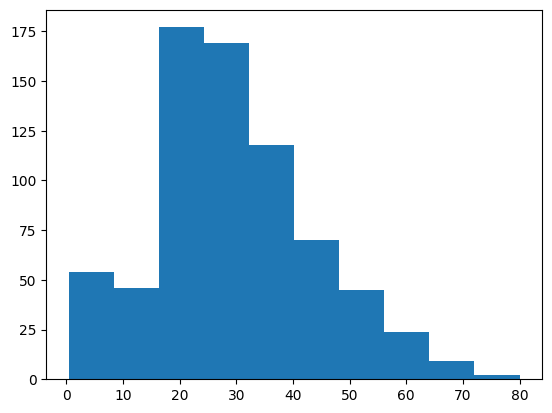

In [9]:
plt.hist(train_data["Age"])

# As we can see, the historgram isn't symmetrical and is skewed
# Therefore, we must use the median to fill in the missing values

In [10]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mean())
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# STEP 5: Findings, Correlations between variables

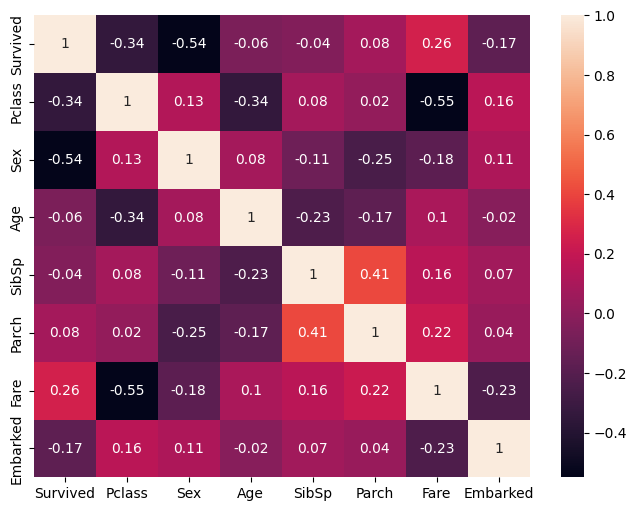

In [12]:
train_data.corr()["Survived"].round(2)
plt.figure(figsize = (8, 6))
plot = sns.heatmap(train_data.corr().round(2), annot= True)
# through the correlation, it can be seen that 
# age, sibsp, and parch only has small effect 
# on survival rate. Thus, they should be dropped. 



In [13]:
train_data.drop(["Age", "Parch", "SibSp"], axis=1)

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1.0,7.2500,2.0
1,1,1,0.0,71.2833,0.0
2,1,3,0.0,7.9250,2.0
3,1,1,0.0,53.1000,2.0
4,0,3,1.0,8.0500,2.0
...,...,...,...,...,...
886,0,2,1.0,13.0000,2.0
887,1,1,0.0,30.0000,2.0
888,0,3,0.0,23.4500,2.0
889,1,1,1.0,30.0000,0.0


# STEP 6: Model Creation 

Importing model from libraries

In [14]:
from sklearn.linear_model import LogisticRegression

Assigning features and target variables 

In [15]:
features = ["Pclass", "Sex", "Fare", "Embarked"]

In [16]:
y = train_data["Survived"]
x = train_data[features]

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.2)

In [17]:
model = LogisticRegression(random_state=42, max_iter=3000, C=0.1, penalty= 'l2', solver= 'lbfgs')

In [18]:
model.fit(x_train, y_train)
test_predict = model.predict(x_val)
mse = mean_squared_error(test_predict, y_val)
print(f"the model is {1 - mse} accurate")

the model is 0.788218793828892 accurate


# STEP 7: Hyperparameter Tuning

In [19]:
parameters = [
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear', 'newton-cg'],
        'C': [0.01, 0.2, 0.1, 1, 10, 100]
    }
]


In [20]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring="accuracy")
grid_search.fit(x_train, y_train)

print(f"best parameters found: {grid_search.best_params_}")
print(f"least mean squared error: {grid_search.best_score_}")

best parameters found: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
least mean squared error: 0.8382352941176471


# STEP 8: Model implementation

In [21]:
x_test = test_data[features]
test_model = model.fit(x, y)
test_predict = test_model.predict(x_test)
print(test_predict)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


# STEP 9: Export results

In [22]:
output = pd.DataFrame({"PassengerId" :test_data.PassengerId, 'Survived' : test_predict})
output.to_csv("submission.csv", index=False)

ey = pd.read_csv("Submission.csv")
ey.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
